# LOADING THE DATASET

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#we use matplotlib inline because to visualize the graph inside the notebook itself

df = pd.read_csv('chennai_house_price_prediction.csv')
df.shape

(7109, 19)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# DATA EXPLORATION

# isnull() function

In [5]:
df.isnull()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

# DATATYPES

In [7]:
df.dtypes
# object is nothing but they are categorical variables
# int64 is nothing but they are continuous variables

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
temp = pd.DataFrame(index = df.columns)
temp['datatype'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
# unique count is nothing but, if all the values of the variable is different --> then unique_count = 7109
# if almost all the values are same in that variable, then you get unique_count values less than 7109(look table)

In [9]:
temp

,datatype,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


In [10]:
# above, some of the datatypes are given as float. How do we check that?
df['N_BEDROOM']
# All the values are in float(1.0,2.0,.....)
# so we can change its datatype. We need to change because float doesn't fits here. we will do it later

0       1.0
1       2.0
2       1.0
3       3.0
4       1.0
       ... 
7104    1.0
7105    3.0
7106    2.0
7107    1.0
7108    3.0
Name: N_BEDROOM, Length: 7109, dtype: float64

# UNIVARIATE ANALYSIS

# HISTOGRAM

Text(0.5, 0, 'Sales')

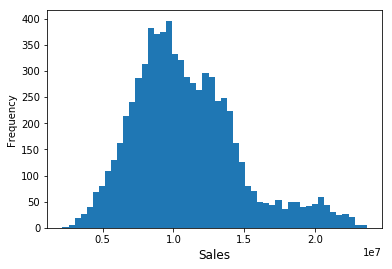

In [11]:
# target variable = sales price
df['SALES_PRICE'].plot.hist(bins = 50)
plt.xlabel('Sales' , fontsize = 12)

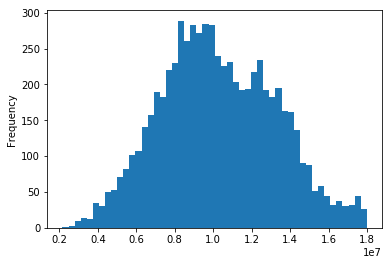

In [12]:
# in the above graph, we can see a few outliers after Sales = 1.8 approximately
# so let's create of threshold of less than 18000000

(df['SALES_PRICE'].loc[df['SALES_PRICE'] < 18000000]).plot.hist(bins = 50)

# now this looks like a perfect NORMAL DISTRIBUTION

Text(0.5, 0, 'Area in square_feet')

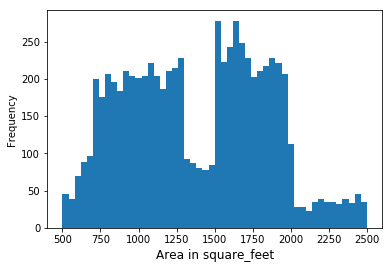

In [13]:
df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in square_feet' , fontsize = 12)

# VALUE COUNTS

In [14]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [15]:
df['N_BEDROOM'].value_counts()/len(df)*100
# this will give the values in percentages
# SO, THESE VALUES ARE MORE INTUITIVE THAN JUST HAVING THE NUMBERS ABOVE

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [16]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

In [17]:
# since we have very less number of categories for these variables, it was very easy for us to look at the numbers
# and percentages. BUT we can also look more intuitively by using plots in this case

# BAR PLOTS

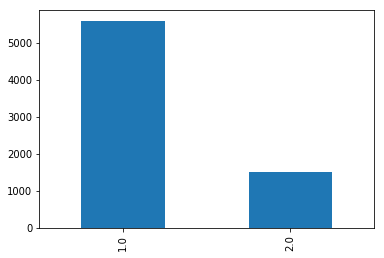

In [18]:
df['N_BATHROOM'].value_counts().plot.bar()

# df['N_BATHROOM'].value_counts().plot(kind = 'bar')

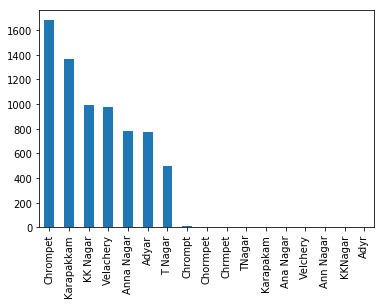

In [19]:
df['AREA'].value_counts().plot(kind = 'bar')

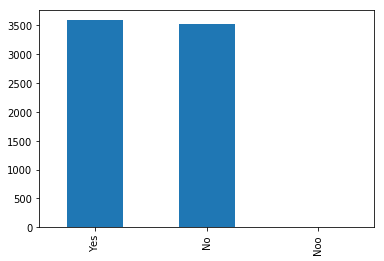

In [20]:
df['PARK_FACIL'].value_counts().plot(kind = 'bar')

# we have spelling error here i.e, 'Noo' . We need to fix this during data manipulation.

In [21]:
# Let's check how many values have 'Noo'
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

# DATA MANIPULATION

In [22]:
# Drop duplicates
# fill the missing values
# correct the data types
# fix the spelling errors in variables

# Drop duplicates

In [23]:
df.drop_duplicates()

# In this function, a duplicate row is deleted only when all the columns of a particular row matches with some other
# row.

# here in PRT_ID --> 0 is Karapakkam and PRT_ID ---> 4 is Karapakkam. So, by default 2nd Karapakkam will be dropped
# when we use subset = ['Area'] function. (LOOK BELOW)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [24]:
df.drop_duplicates().shape

(7109, 19)

In [25]:
df.shape

# after applying the drop_duplicates function, the size of the dataset has not changed
# that means there are no duplicates available in our dataset

(7109, 19)

In [26]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

In [27]:
df.drop_duplicates(subset = ['AREA'])

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
22,P06851,KK Nagar,2010,114,3.0,2.0,5,Partial,No,Others,NoSewr,Gravel,RH,3.4,4.5,3.4,3.730,262210,10925400
24,P00902,TNagar,1972,111,2.0,1.0,5,AdjLand,No,Others,NoSewr,No Access,RH,4.1,4.4,2.8,3.590,167073,13922760
25,P00293,T Nagar,1685,105,1.0,1.0,4,Family,No,House,NoSewr,Gravel,RM,2.8,4.4,4.0,3.740,176415,12601080
175,P00920,Chrompt,869,39,1.0,1.0,3,Family,No,Others,NoSewr,No Access,RM,4.3,4.8,3.3,4.200,138935,8172630
245,P00166,Chrmpet,1277,111,2.0,1.0,4,AdjLand,Yes,Commercial,AllPub,No Access,RM,4.0,3.8,3.4,3.740,47131,15710400


In [28]:
df.drop_duplicates(subset = ['AREA']).shape

(17, 19)

In [29]:
df.shape

# here even after removing the duplicates of 'AREA', the shape of the dataset is still 7109*19. This is because
# the drop_duplicates do not make any changes in the original dataset. If you wanna change in the original datset
# we need to mention another attribute in the drop_duplicates function and that is            inplace = True

(7109, 19)

# MISSING VALUES

In [30]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [31]:
# DIFFERENT WAYS TO DEAL WITH MISSING VALUES

# 1. remove the rows with missing values
# 2. mean or median in case of continuous variable
# 3. with mode in case of categorical variable
# 4. using other independent variables

# drop rows with missing values

In [32]:
df.dropna(axis = 0 , how = 'any')

# to make any changes to original data, use inplace = True
# in this case 54 rows are dropped

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [33]:
df.dropna(axis = 1 , how = 'any')

# in this case 3 columns are removed. check at the bottom of the dataset for the shape of the dataset

# but by using this dropping method, a lot of useful information is being lost. So, to fix this, there are other
# methods to treat the missing values

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
5,P00219,Chrompet,1220,36,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,198316,12394750
6,P09105,Chrompet,1167,137,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,33955,8488790
7,P09679,Velachery,1847,176,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,235204,16800250
8,P03377,Chrompet,771,175,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,33236,8308970
9,P09623,Velachery,1635,74,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,121255,8083650


# N_BEDROOM

In [34]:
# 1. N_BEDROOM 

df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [35]:
df['N_BEDROOM'].fillna(value = (df['N_BEDROOM'].mode()[0]) , inplace = True)

In [36]:
df

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


# N_BATHROOM

In [37]:
# 2. N_BATHROOM

df.loc[df['N_BATHROOM'].isnull() == True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [38]:
for i in range(0 , len(df)):
    if pd.isnull(df['N_BATHROOM'][i]) == True:
        if (df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else:
            df['N_BATHROOM'][i] = 2.0

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# QS_OVERALL

In [39]:
df[['QS_ROOMS' , 'QS_BATHROOM' , 'QS_BEDROOM' , 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [40]:
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'] , df['QS_BATHROOM'] , df['QS_BEDROOM'] , temp] , axis = 1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


In [41]:
# to know how many missing values are present in our dataset

df.loc[df['QS_OVERALL'].isnull() == True].shape

# 48 missing values are present

(48, 19)

In [42]:
def fill_na(x):
    return (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM']/3)

In [43]:
df['QS_OVERALL'] = df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'] , axis = 1)

In [44]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

# HENCE, TILL HERE ALL THE MISSING VALUES ARE TREATED
# i.e, MANIPULATED

# DATATYPES

In [45]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL        object
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [46]:
# changing the datatypes of bedroom, bathroom, rooms by using astype function

df = df.astype({'N_BEDROOM' : 'object' , 'N_ROOM' : 'object' , 'N_BATHROOM' : 'object'})

In [47]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL        object
COMMIS             int64
SALES_PRICE        int64
dtype: object

# REPLACE CATEGORIES

In [48]:
temp = ['AREA' , 'N_BEDROOM' , 'N_BATHROOM' , 'N_ROOM' , 'SALE_COND' , 'PARK_FACIL' , 'BUILDTYPE' , 'UTILITY_AVAIL'
       , 'STREET' , 'MZZONE']
for i in temp:
    print ('************** Value count in' , i, '*****************')
    print (df[i].value_counts())
    print ('')

************** Value count in AREA *****************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

************** Value count in N_BEDROOM *****************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

************** Value count in N_BATHROOM *****************
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

************** Value count in N_ROOM *****************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

************** Value count in SALE_COND *****************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall       

In [49]:
# By looking at all the variables, make a note of all the variables that need to be modified (spelling mistake,etc.)

df['PARK_FACIL'].replace({'Noo' : 'No'} , inplace = True)
df['PARK_FACIL'].value_counts()

# Here 'Noo' has been replace with 'No' and 3520 has changed to 3522

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [50]:
df['BUILDTYPE'].replace({'Comercial' : 'Commercial' , 'Other' : 'Others'} , inplace = True)

In [51]:
# similarly do it for AREA , SALE_COND , BUILDTYPE , UTILITY_AVAIL , STREET as an exercise

# BIVARIATE ANALYSIS

In [52]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

# HYPOTHESIS

# 1 . HOUSE FEATURES

# Interior Area and sales price(target)

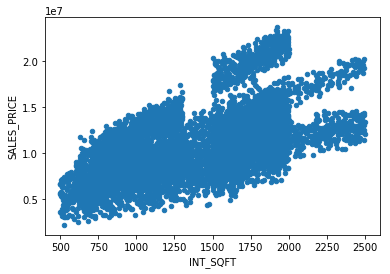

In [53]:
# interior area and sales price(target)

df.plot.scatter('INT_SQFT' , 'SALES_PRICE')

# By looking at the graph, we can say that there is a linear relationship between interior area and sales_price

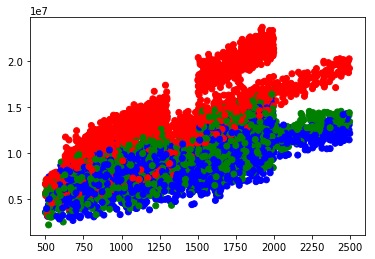

In [54]:
fig , ax = plt.subplots()
colors = {'Commercial' : 'red' , 'House' : 'blue' , 'Others' : 'green'}
ax.scatter(df['INT_SQFT'] , df['SALES_PRICE'] , c=df['BUILDTYPE'].apply(lambda x : colors[x]))
plt.show()

# sales price against no. of bedrooms and bathrooms

In [55]:
# sales price of houses wrt number of bedrooms and bathrooms

In [56]:
# creating a pivot table

df.pivot_table(values = 'SALES_PRICE' , index = 'N_BEDROOM' , columns = 'N_BATHROOM' , aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


# QS_OVERALL AND SALES_PRICE

In [57]:
# QS_OVERALL AND SALES_PRICE

df.plot.scatter('QS_OVERALL' , 'SALES_PRICE')

ValueError: scatter requires x column to be numeric

In [58]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL        object
COMMIS             int64
SALES_PRICE        int64
dtype: object

Text(0.5, 1.0, 'QS_ROOMS')

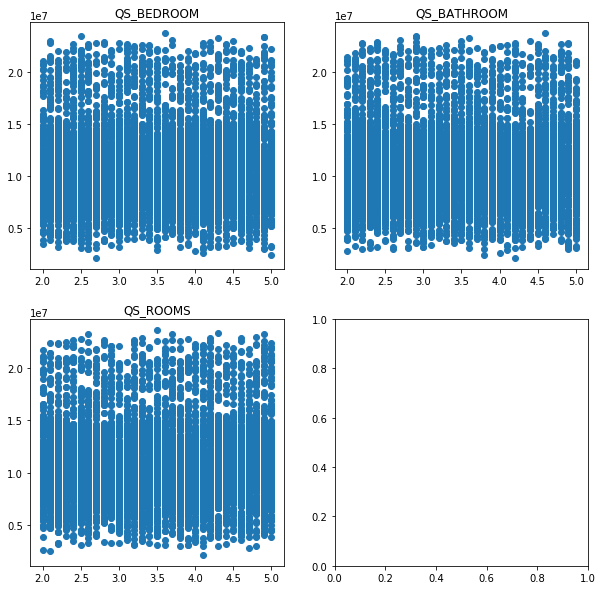

In [59]:
fig , axs = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df['QS_BEDROOM'] , df['SALES_PRICE'])
axs[0,0].set_title('QS_BEDROOM')

axs[0,1].scatter(df['QS_BATHROOM'] , df['SALES_PRICE'])
axs[0,1].set_title('QS_BATHROOM')

axs[1,0].scatter(df['QS_ROOMS'] , df['SALES_PRICE'])
axs[1,0].set_title('QS_ROOMS')

# axs[1,1].scatter(df['QS_OVERALL'] , df['SALES_PRICE'])
# axs[1,1].set_title('QS_OVERALL')

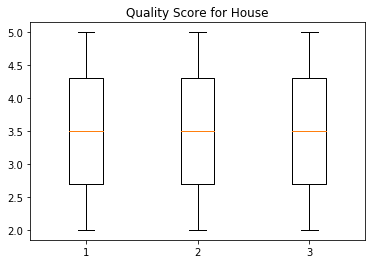

In [60]:
ax = plt.figure().add_subplot(111)
ax.set_title('Quality Score for House')

# creating the boxplot
bp = ax.boxplot([df['QS_BEDROOM'] , df['QS_ROOMS'] , df['QS_BATHROOM']])

# check what's happening with QS_OVERALL

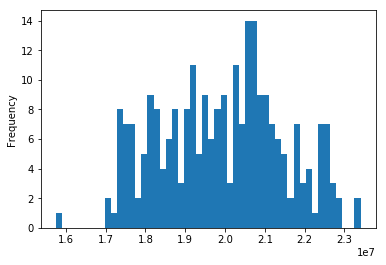

In [61]:
temp_df = df.loc[(df['BUILDTYPE'] == 'Commercial') & (df['AREA'] == 'Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins = 50)

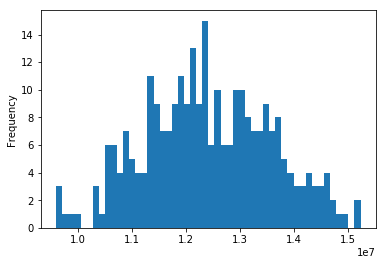

In [62]:
temp_df = df.loc[(df['BUILDTYPE'] == 'House') & (df['AREA'] == 'Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins = 50)

# 2. SURROUNDING LOCALITY

In [63]:
# 5. Building Type and Parking Facility

In [64]:
df.groupby(['BUILDTYPE' , 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

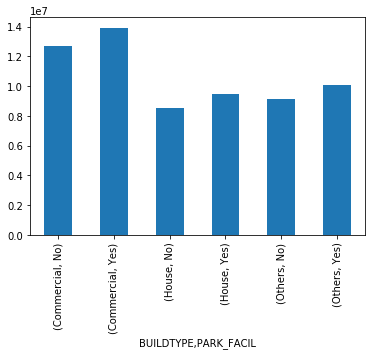

In [65]:
temp = df.groupby(['BUILDTYPE' , 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar' , stacked = True)

In [66]:
# 6. area wise price for houses

In [67]:
df.pivot_table(values = 'SALES_PRICE' , index = 'AREA' , aggfunc = 'median')

# change the spelling mistakes

,SALES_PRICE
AREA,
Adyar,8871195
Adyr,9044045
Ana Nagar,20020970
Ann Nagar,13488705
Anna Nagar,13714220
Chormpet,9593035
Chrmpet,8276185
Chrompet,9607900
Chrompt,9668900


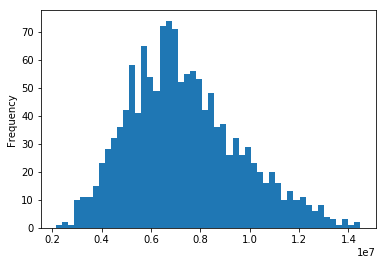

In [68]:
temp_df = df.loc[(df['AREA'] == 'Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins = 50)

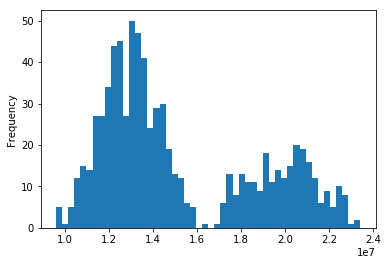

In [69]:
temp_df = df.loc[(df['AREA'] == 'Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins = 50)

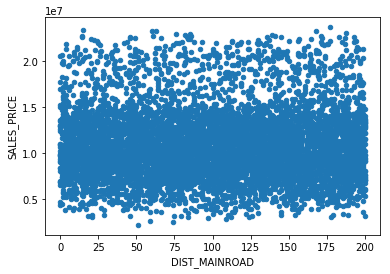

In [70]:
# 7. distance from main road

df.plot.scatter('DIST_MAINROAD' , 'SALES_PRICE')

In [71]:
df.groupby(['STREET']).SALES_PRICE.median()

# change the spelling mistakes afterwards

STREET
Gravel       10847225
No Access     9418295
NoAccess      8372750
Pavd         10947560
Paved        10468415
Name: SALES_PRICE, dtype: int64

# HOUSE SALE PRICE

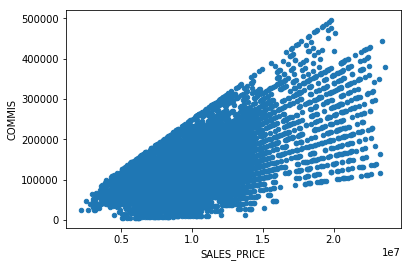

In [72]:
df.plot.scatter('SALES_PRICE' , 'COMMIS')

In [73]:
# LET'S CHECK THE CORRELATION

df[['SALES_PRICE' , 'COMMIS']].corr()

# here the correlation is 0.626275 which is pretty high

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000
